# Salary Prediction Analysis in Indonesia

<span style="font-size: 24px; font-weight: 500;">Overview</span>


This repository contains a comprehensive analysis of the "indonesia-salary.csv" dataset, aiming to predict salaries based on several features like age, years of experience, gender, and job title. Through extensive data processing, visualization, and machine learning, we've derived valuable insights and built predictive models with impressive accuracy.

<span style="font-size: 24px; font-weight: 500;">Dataset</span>


The primary dataset used is "indonesia-salary.csv", which encompasses sereval features:

* **Experience Level** : The total working experience of the employees.
* **Job Title** : The designation or role of the employees.
* **Education Level** : The highest educational qualification of the employees.
* **Salary** : The monthly salary of the employees.

<span style="font-size: 24px; font-weight: 600;">Procedures and Analysis</span>


<span style="font-size: 20px; font-weight: 500;">Data Exploration and Visualization :</span>


* Loaded the dataset into a pandas DataFrame for easy manipulation and analysis.
* Conducted a comprehensive overview of the dataset, understanding its structure and content.
* Used statistical measures to understand the distribution and central tendencies of the data.
* Visualized the data using libraries like <span style="background-color: lightgrey;">mathplotlib</span> and <span style="background-color: lightgrey;">seaborn</span> to understand the relationships between different features and the target variable.

<span style="font-size: 20px; font-weight: 500;">Data Preprocessing :</span>


* Used MinMaxScaler for scaling numeric features.
* Encoded categorical variables to convert them into a format suitable for machine learning.
* Split the dataset into training and testing sets to train and subsequently evaluate our machine learning models.

<span style="font-size: 20px; font-weight: 500;">Model Training and Evaluation :</span>


* Employeed several regression algorithms, including: 

    * Linear Regression
    * Decision Tree Regression
    * Extra Tree Regression
    * Gradient Boosting Regression
    * Random Forest Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
* Trained each model on the training set and evaluated their perfomance on the testing set using R-squared as the metric.

<span style="font-size: 20px; font-weight: 500;">Results</span>


The R-squared values for each of the models are as follows:

<span style="font-size: 24px; font-weight: 600;">"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."</span>


(The Most Highest R-squared value)

<span style="font-size: 20px; font-weight: 500;">Importing the necessary libraries</span>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR

plt.style.use('fivethirtyeight')

<span style="font-size: 20px; font-weight: 500;">Reading the dataset</span>


In [3]:
df = pd.read_csv('indonesia_salary.csv')
print(df.shape)
df.head()

(5302, 6)


,id,job_title,location,experience_level,education_level,salary
0,19357,Marketing Director,Jakarta,10,Magister,115000000
1,33144,Direktur Operasional,Jakarta,5,Sarjana,115000000
2,18453,Vp Engineering,Jakarta,10,Magister,110000000
3,26973,Head Of Business & Fraud Risk Management,Jakarta,10,Magister,100000000
4,34133,Management Consulting,Jakarta,3,Doktor,90000000


<span style="font-size: 20px; font-weight: 500;">An overview of the dataset</span>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5302 non-null   int64 
 1   job_title         5302 non-null   object
 2   location          5302 non-null   object
 3   experience_level  5302 non-null   int64 
 4   education_level   5302 non-null   object
 5   salary            5302 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 248.7+ KB


<span style="font-size: 20px; font-weight: 500;">Statistical information of numeric features of the dataset</span>


In [9]:
print(df.describe())

                 id  experience_level        salary
count   5302.000000       5302.000000  5.302000e+03
mean   21384.073369          2.279894  7.688450e+06
std    11129.001534          1.841515  6.367702e+06
min        6.000000          0.000000  6.650000e+02
25%    11711.000000          1.000000  4.500000e+06
50%    23308.000000          2.000000  6.000000e+06
75%    32387.750000          3.000000  9.000000e+06
max    34746.000000         20.000000  1.150000e+08


In [11]:
for col in ('education_level', 'job_title'):
    print(f'for column {col}, there is {df[col].nunique()} unique values.')

for column education_level, there is 3 unique values.
for column job_title, there is 3368 unique values.


<span style="font-size: 20px; font-weight: 500;">Exploratory Data Analysis</span>


<span style="font-size: 20px; font-weight: 500;">Scatter plot for Years of Experience and Salary</span>

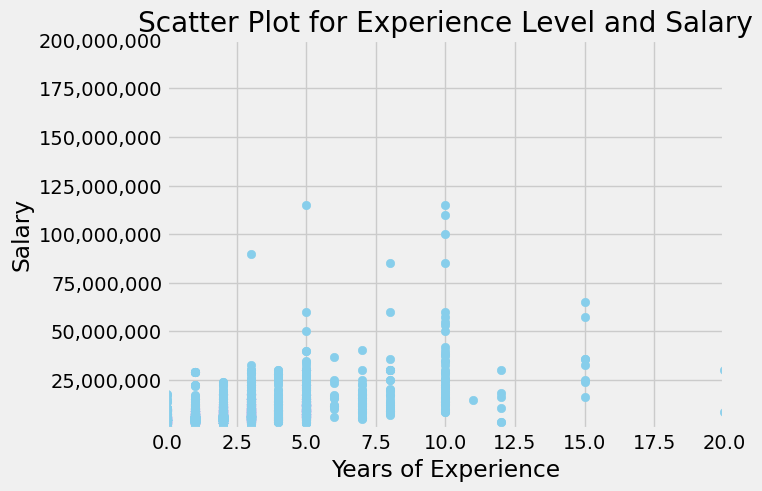

In [15]:
df_filtered = df[(df['salary'] >= 1_000_000) & (df['experience_level'] <= 20)]

plt.scatter(df_filtered['experience_level'], df_filtered['salary'], color='skyblue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot for Experience Level and Salary')

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(25_000, 200_000_000)
plt.xlim(0, 20)

plt.show()

<span style="font-size: 20px; font-weight: 500;">Mean of Salary for each Educational Level</span>

C:\Users\rflip\AppData\Local\Temp\ipykernel_15276\4000055652.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  educationSalary = df.groupby('education_level').agg({'salary': lambda x: x.mean()}).reset_index()


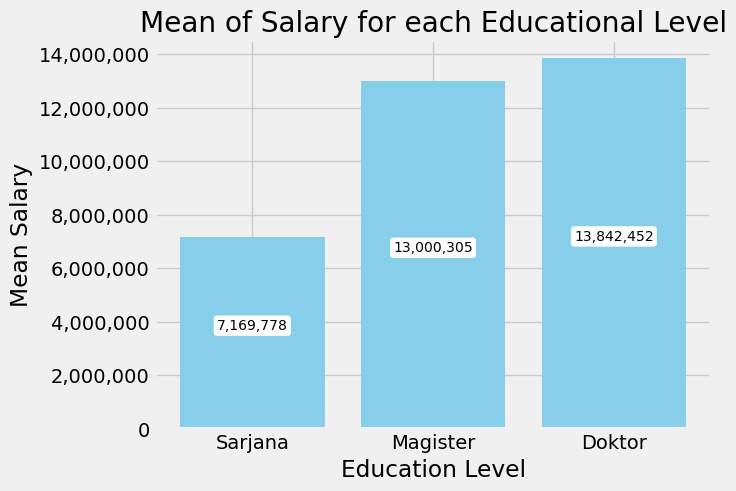

In [19]:
categories = ['Sarjana', 'Magister', 'Doktor']
df['education_level'] = pd.Categorical(df['education_level'], categories=categories, ordered=True)

educationSalary = df.groupby('education_level').agg({'salary': lambda x: x.mean()}).reset_index()

bars = plt.bar(educationSalary['education_level'], educationSalary['salary'], color='skyblue')

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, '{:,.0f}'.format(yval), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))

plt.title('Mean of Salary for each Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.show()

<span style="font-size: 20px; font-weight: 500;">Top 5 Salary based on Location</span>

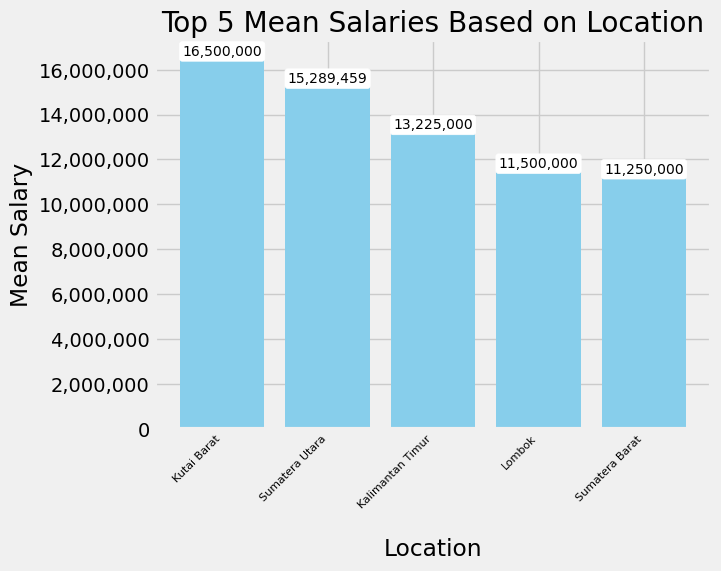

In [22]:
jobSalary = df.groupby('location').agg({'salary': lambda x: x.mean()}).reset_index()

# Get the top 5 locations by mean salary
top5JobSalary = jobSalary.sort_values(by='salary', ascending=False).head(5)

# Create the bar plot
bars = plt.bar(top5JobSalary['location'], top5JobSalary['salary'], color='skyblue')

# Format y-axis values
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Add text labels on bars
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:,.0f}'.format(yval), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))

# Customize the plot
plt.xlabel('Location', labelpad=20, loc='center')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Top 5 Mean Salaries Based on Location')
plt.ylabel('Mean Salary')
plt.show()

<span style="font-size: 20px; font-weight: 500;">Top 5 Mean of Salary for each Job Title</span>

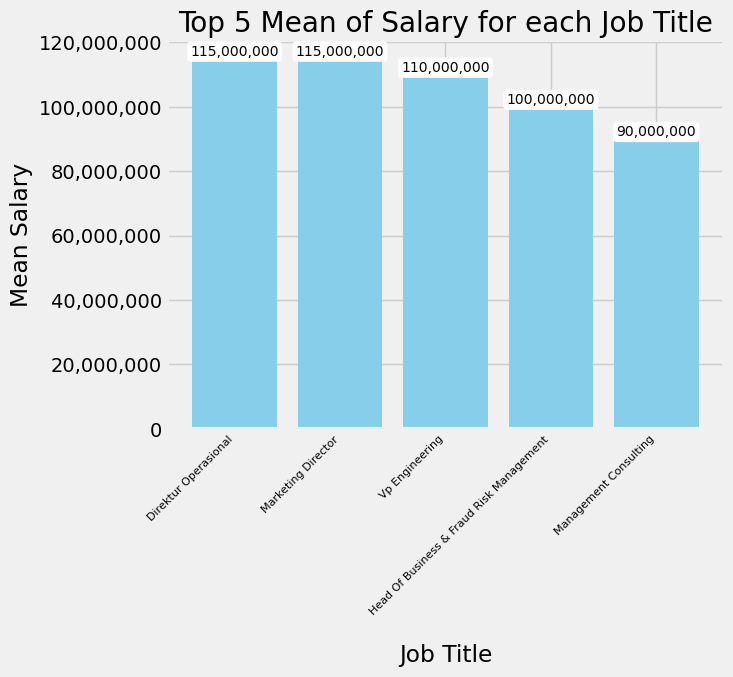

In [25]:
jobSalary = df.groupby('job_title').agg({'salary': lambda x: x.mean()}).reset_index()

top5JobSalary = jobSalary.sort_values(by='salary', ascending=False).head(5)

bars = plt.bar(top5JobSalary['job_title'], top5JobSalary['salary'], color='skyblue')

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:,.0f}'.format(yval), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))

plt.xlabel('Job Title', labelpad=20, loc='center')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.title('Top 5 Mean of Salary for each Job Title')
plt.ylabel('Mean Salary')
plt.show()

<span style="font-size: 20px; font-weight: 500;">Least 5 Mean of Salary for each Job Title</span>

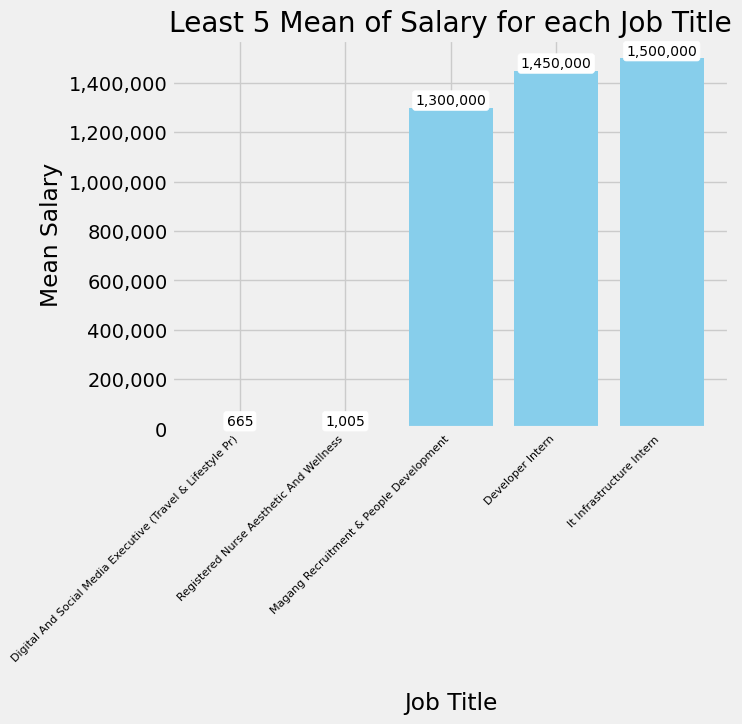

In [28]:
jobTitleSalary = df.groupby('job_title').agg({'salary': lambda x: x.mean()}).sort_values('salary', ascending=True).head(5).reset_index()

# Membuat chart
bars = plt.bar(jobTitleSalary['job_title'], jobTitleSalary['salary'], color='skyblue')

# Memformat angka pada sumbu y agar tidak menggunakan notasi ilmiah
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Menambahkan teks di atas setiap bar dengan format angka yang diformat
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:,.0f}'.format(yval), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))

# Menyesuaikan label sumbu x agar berada di tengah dan memperkecil ukuran tulisan
plt.xlabel('Job Title', labelpad=20, loc='center')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.title('Least 5 Mean of Salary for each Job Title')
plt.ylabel('Mean Salary')
plt.show()

<span style="font-size: 20px; font-weight: 500;">Defining our data workflow</span>

<span style="font-size: 20px; font-weight: 500;">Preprocessing our data using <span style="background-color: lightgrey;"> ColumnTransformer </span></span>

In [32]:
import numpy as np

cat_features = ['location', 'education_level', 'job_title']
num_features = ['experience_level']


df.dropna(inplace=True)

preprocess = ColumnTransformer([
    # ('cat_transform', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), df.columns.get_indexer_for(cat_features)),
    ('cat_transform', OneHotEncoder(handle_unknown='infrequent_if_exist'), df.columns.get_indexer_for(cat_features)),
    ('num_features', MinMaxScaler(), df.columns.get_indexer_for(num_features)),
], remainder='passthrough')

In [34]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', TransformedTargetRegressor(regressor=LinearRegression(), transformer=MinMaxScaler()))
])

X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=.8)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  array([2, 4, 1], dtype=int64)),
                                                 ('num_features',
                                                  MinMaxScaler(),
                                                  array([3], dtype=int64))])),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=MinMaxScaler()))])

<span style="font-size: 20px; font-weight: 500;">defining a dictionary for hyperparameter distrobutions</span>

In [37]:
param_distributions = {
    'LinearRegression': {
        'regressor__fit_intercept': [True, False],
    },
    'DecisionTreeRegressor': {
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21)
    },
    'ExtraTreeRegressor': {
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
    },
    'GradientBoostingRegressor': {
        'regressor__n_estimators': np.arange(50, 501, 50),
        'regressor__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
        'regressor__max_depth': np.arange(1, 11),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
        'regressor__subsample': np.linspace(0.5, 1, 6)
    },
    'RandomForestRegressor': {
        'regressor__n_estimators': np.arange(50, 501, 50),
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
        'regressor__bootstrap': [True, False]
    },
    'Ridge': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__fit_intercept': [True, False],
    },
    'Lasso': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__fit_intercept': [True, False],
        # 'regressor__normalize': [True, False],
        'regressor__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__l1_ratio': np.linspace(0, 1, 11),
        'regressor__fit_intercept': [True, False],
        'regressor__selection': ['cyclic', 'random']
    }
}

<span style="font-size: 20px; font-weight: 500;">Hyperparameter optimizing using <span style="background-color: lightgrey;"> RandomizeSearchCV </span></span>

In [40]:
best_models = dict()
best_params = dict()
best_score = dict()
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=.8)
for model in param_distributions.keys():
    print(model)
    pipeline.steps[1] = (f"regressor", eval(f"{model}()"))
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions[model],
                                       n_iter=50, cv=5, random_state=42)
    random_search.fit(X_train, y_train) 
    best_models[model] = random_search.best_estimator_
    best_params[model] = random_search.best_params_
    best_score[model] = random_search.best_score_

LinearRegression


C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTreeRegressor
ExtraTreeRegressor
GradientBoostingRegressor
RandomForestRegressor
Ridge


C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 26 is smaller than n_iter=50. Running 26 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Lasso


C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356282514251939.0, tolerance: 31048464808044.61
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1538545511953133.0, tolerance: 35076708680968.027
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1494918365234267.5, tolerance: 35459564412351.07
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.

ElasticNet


C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2335999400803729.0, tolerance: 31048464808044.61
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2864021650088658.0, tolerance: 35076708680968.027
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2824821191646168.0, tolerance: 35459564412351.07
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rflip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.

<span style="font-size: 20px; font-weight: 500;">Plotting the models performances</span>

* we can see that the <span style="background-color: lightgrey;"> GradientBoostingRegressor  </span> has the best performance

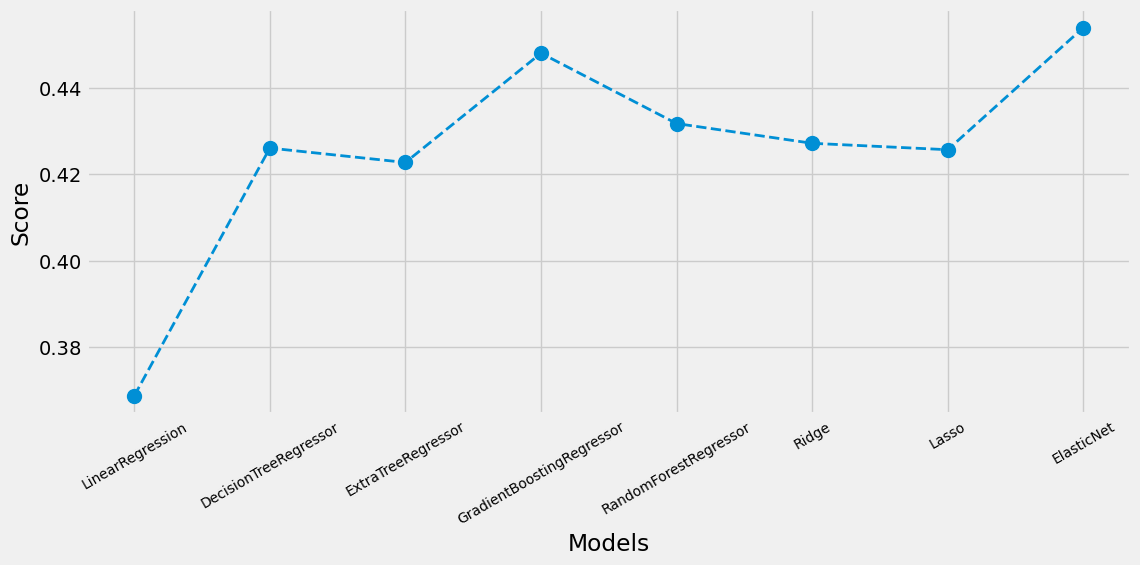

In [42]:
fig = plt.figure(figsize=(12, 5))
df_best_models = pd.DataFrame().from_dict(best_score, orient='index').reset_index()
df_best_models.columns = ['model', 'score']
plt.plot(df_best_models['model'], df_best_models['score'], marker='o', ms=10, linewidth=2, linestyle='dashed')
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

<span style="font-size: 20px; font-weight: 500;">Plotting the scatter chart of predicted results w.r.t true target variable</span>

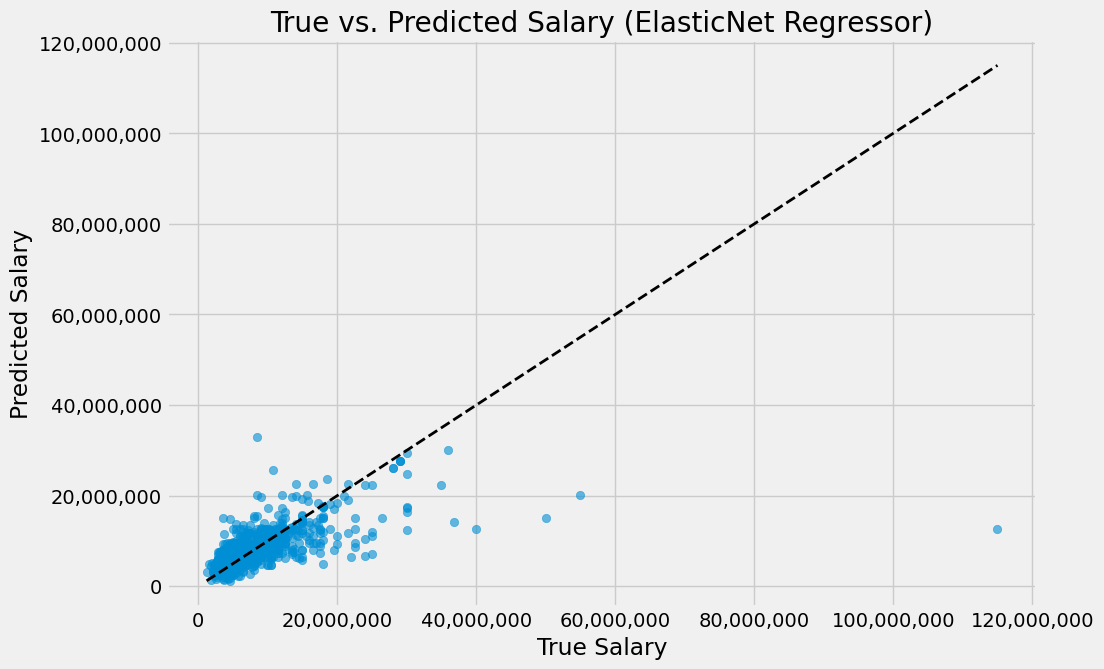

In [62]:
model = 'ElasticNet'

# Make predictions using the ElasticNet model
y_pred = best_models[model].predict(X_test)

# Convert salaries to millions
y_test_million = y_test / 1_000_000
y_pred_million = y_pred / 1_000_000

# Create the plot
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title(f'True vs. Predicted Salary ({model} Regressor)')
plt.grid(True)

# Set the formatter to add commas to the ticks
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [46]:
best_score

{'LinearRegression': 0.36870926920291586,
 'DecisionTreeRegressor': 0.42605212167236417,
 'ExtraTreeRegressor': 0.42272488948483355,
 'GradientBoostingRegressor': 0.4480097324232645,
 'RandomForestRegressor': 0.43173127268477823,
 'Ridge': 0.4271569564004448,
 'Lasso': 0.42567327141816447,
 'ElasticNet': 0.4539139502889437}